### Linear SCM simulations with variance shift noise interventions in Section 5.2.2


variance shift instead of mean shift

| Sim Num       | name                             | better estimator | baseline | 
| :-----------: | :--------------------------------|:----------------:| :-------:|
|  (viii)       | Single source anti-causal DA without Y interv + variance shift | DIP-std+      | DIP   |
|  (ix)         | Multiple source anti-causal DA with Y interv + variance shift  | CIRMweigh-std+ | OLSPool  |


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['axes.facecolor'] = 'lightgray'
np.set_printoptions(precision=3)
sns.set(style="darkgrid")

#### Helper functions

In [2]:
def boxplot_all_methods(plt_handle, res_all, title='', names=[], colors=[], ylim_option=0):   
    res_all_df = pd.DataFrame(res_all.T)
    res_all_df.columns = names
    res_all_df_melt = res_all_df.melt(var_name='methods', value_name='MSE')
    res_all_mean = np.mean(res_all, axis=1)
    
    plt_handle.set_title(title, fontsize=20)

    plt_handle.axhline(res_all_mean[1], ls='--', color='b')
    plt_handle.axhline(res_all_mean[0], ls='--', color='r')
    ax = sns.boxplot(x="methods", y="MSE", data=res_all_df_melt,
                     palette=colors,
                     ax=plt_handle)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-70, ha='left', fontsize=20)
    ax.tick_params(labelsize=20)
#     ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.grid(False) # Hide the horizontal gridlines
    ax.xaxis.grid(True) # Show the vertical gridlines
#     ax.xaxis.set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("MSE", fontsize=20)

    if ylim_option == 1:
        lower_ylim = res_all_mean[0] -  (res_all_mean[1] - res_all_mean[0]) *0.3
        # upper_ylim = max(res_all_mean[1] + (res_all_mean[1] - res_all_mean[0]) *0.3, res_all_mean[0]*1.2)
        upper_ylim = res_all_mean[1] + (res_all_mean[1] - res_all_mean[0]) *0.3
        # get the boxes that are outside of the plot
        outside_index = np.where(res_all_mean >  upper_ylim)[0]
        for oindex in outside_index:
            ax.annotate("box\nbeyond\ny limit", xy=(oindex - 0.3, upper_ylim - (upper_ylim-lower_ylim)*0.15 ), fontsize=15)
        plt_handle.set_ylim(lower_ylim, upper_ylim)
        
def scatterplot_two_methods(plt_handle, res_all, index1, index2, names, colors=[], title="", ylimmax = -1):
    plt_handle.scatter(res_all[index1], res_all[index2], alpha=1.0, marker='+', c = np.array(colors[index2]).reshape(1, -1), s=100)
    plt_handle.set_xlabel(names[index1], fontsize=20)
    plt_handle.set_ylabel(names[index2], fontsize=20)
    plt_handle.tick_params(labelsize=20)
    # 
    if ylimmax <= 0:
        # set ylim automatically
#         ylimmax = np.max((np.max(res_all[index1]), np.max(res_all[index2])))
        ylimmax = np.percentile(np.concatenate((res_all[index1], res_all[index2])), 90)
        print(ylimmax)
    
    plt_handle.plot([0, ylimmax],[0, ylimmax], 'k--', alpha=0.5)
    # plt.axis('equal')
    plt_handle.set_xlim(0.0, ylimmax)
    plt_handle.set_ylim(0.0, ylimmax)
        
    plt_handle.set_title(title, fontsize=20)

#### 8. Single source anti-causal DA without Y interv + variance shift - boxplots
boxplots showwing thatDIP-std+ and DIP-MMD works

In [3]:
names_short = ["OLSTar", "OLSSrc[1]", "DIP[1]-mean", "DIP[1]-std+", "DIP[1]-MMD"]

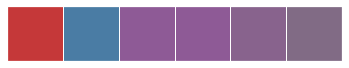

In [4]:
COLOR_PALETTE1 = sns.color_palette("Set1", 9, desat=1.)
COLOR_PALETTE2 = sns.color_palette("Set1", 9, desat=.7)
COLOR_PALETTE3 = sns.color_palette("Set1", 9, desat=.5)
COLOR_PALETTE4 = sns.color_palette("Set1", 9, desat=.3)

# this corresponds to the methods in names_short
COLOR_PALETTE = [COLOR_PALETTE2[0], COLOR_PALETTE2[1], COLOR_PALETTE2[3], COLOR_PALETTE2[3], COLOR_PALETTE3[3], COLOR_PALETTE4[3]]
sns.palplot(COLOR_PALETTE)

In [5]:
interv_type = 'sv1'
M = 2
lamL2 = 0.
lamL1 = 0.
epochs = 20000
lr = 1e-4
n = 5000
prefix_template_exp8_box = "simu_results/sim_exp8_box_r0%sd31020_%s_lamMatch%s_n%d_epochs%d_repeats%d"
save_dir = 'paper_figures'

In [6]:
nb_ba = 4

results_src_ba = np.zeros((3, M-1, nb_ba, 2, 10))
results_tar_ba = np.zeros((3, 1, nb_ba, 2, 10))
savefilename_prefix = prefix_template_exp8_box %(interv_type, 'baseline', 1.,
                                                   n, epochs, 10)
res_all_ba = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)

for i in range(3): 
    for j in range(1):
        results_src_ba[i, :], results_tar_ba[i, :] = res_all_ba.item()[i, j]


In [7]:
lamMatches = [10.**(k) for k in (np.arange(10)-5)]
print(lamMatches)
nb_damean = 2 # DIP, DIPOracle
results_src_damean = np.zeros((3, len(lamMatches), M-1, nb_damean, 2, 10))
results_tar_damean = np.zeros((3, len(lamMatches), 1, nb_damean, 2, 10))

for k, lam in enumerate(lamMatches):
    savefilename_prefix = prefix_template_exp8_box %(interv_type, 'DAmean', lam,
                                                   n, epochs, 10)
    res_all_damean = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
    
    for i in range(3): 
        for j in range(1):
            results_src_damean[i, k, :], results_tar_damean[i, k, 0, :] = res_all_damean.item()[i, j]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


In [8]:
nb_dastd = 2 # DIP-std, DIP-std+
results_src_dastd = np.zeros((3, len(lamMatches), M-1, nb_dastd, 2, 10))
results_tar_dastd = np.zeros((3, len(lamMatches), 1, nb_dastd, 2, 10))

for k, lam in enumerate(lamMatches):
    savefilename_prefix = prefix_template_exp8_box %(interv_type, 'DAstd', lam,
                                                   n, epochs, 10)
    res_all_dastd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
    
    for i in range(3): 
        for j in range(1):

            # run methods on data generated from sem
            results_src_dastd[i, k, :], results_tar_dastd[i, k, 0, :] = res_all_dastd.item()[i, j]

In [9]:
nb_dammd = 1 # DIP-MMD
results_src_dammd = np.zeros((3, len(lamMatches), M-1, nb_dammd, 2, 10))
results_tar_dammd = np.zeros((3, len(lamMatches), 1, nb_dammd, 2, 10))

for k, lam in enumerate(lamMatches):
    savefilename_prefix = prefix_template_exp8_box %(interv_type, 'DAMMD', lam,
                                                   n, 2000, 10)
    res_all_dammd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
    
    for i in range(3): 
        for j in range(1):

            # run methods on data generated from sem
            results_src_dammd[i, k, :], results_tar_dammd[i, k, 0, :] = res_all_dammd.item()[i, j]

In [10]:
# now add the methods
results_tar_plot = {}

lamMatchIndex = 6
print("Fix lambda choice: lmabda = ", lamMatches[lamMatchIndex])
for i in range(3):
    results_tar_plot[i] = np.concatenate((results_tar_ba[i, 0, :2, 0, :],
                                   results_tar_damean[i, lamMatchIndex, 0, 0, 0, :].reshape(1, -1),
                                   results_tar_dastd[i, lamMatchIndex, 0, 1, 0, :].reshape(1, -1),
                                   results_tar_dammd[i, lamMatchIndex, 0, 0, 0, :].reshape(1, -1)), axis=0)


Fix lambda choice: lmabda =  10.0


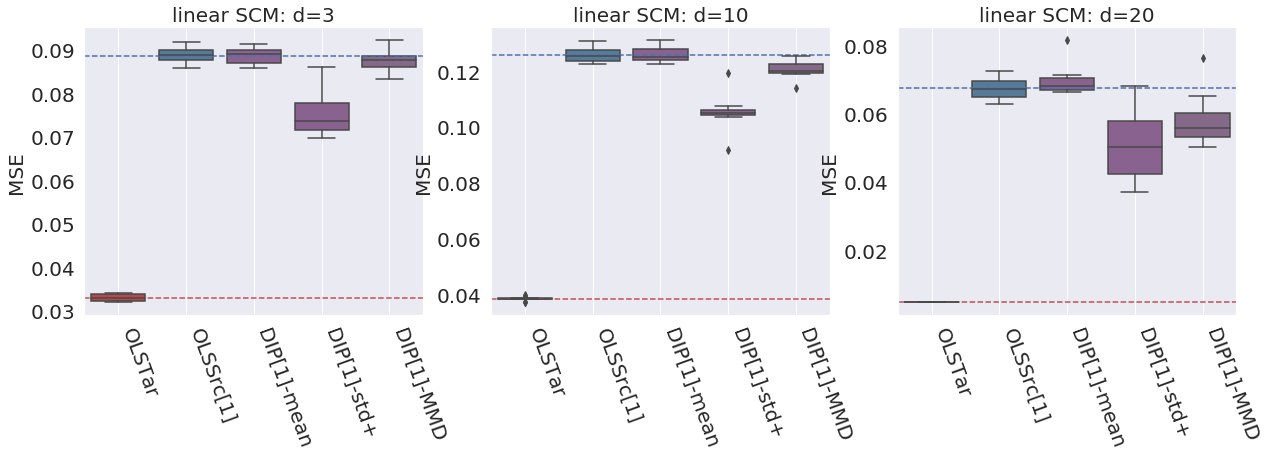

In [11]:
ds = [3, 10, 20]
fig, axs = plt.subplots(1, 3, figsize=(20,5))
for i in range(3):
    boxplot_all_methods(axs[i], results_tar_plot[i], 
                                     title="linear SCM: d=%d" %(ds[i]), names=names_short, colors=COLOR_PALETTE[:len(names_short)])

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6,
                        wspace=0.2)
plt.savefig("%s/sim_6_2_exp_%s.pdf" %(save_dir, interv_type), bbox_inches="tight")
plt.show()

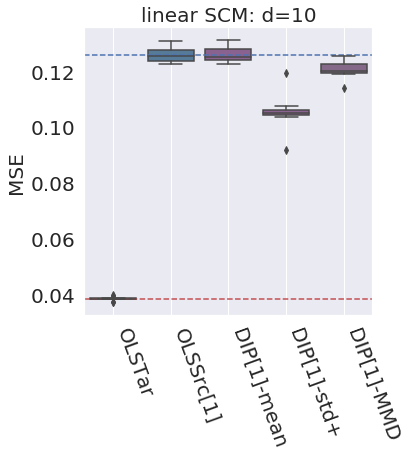

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))

boxplot_all_methods(axs, results_tar_plot[1], 
                                     title="linear SCM: d=%d" %(10), names=names_short, colors=COLOR_PALETTE[:len(names_short)])

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6,
                        wspace=0.2)
plt.savefig("%s/sim_6_2_exp_%s_single10.pdf" %(save_dir, interv_type), bbox_inches="tight")
plt.show()

#### 8 Single source anti-causal DA without Y interv + variance shift - scatterplots

Scatterplots showing that DIP-std+ and DIP-MMD works

In [13]:
interv_type = 'sv1'
M = 2
lamL2 = 0.
lamL1 = 0.
epochs = 20000
lr = 1e-4
n = 5000
prefix_template_exp8_scat = "simu_results/sim_exp8_scat_r0%sd10_%s_lamMatch%s_n%d_epochs%d_seed%d"

In [14]:
nb_ba = 4
repeats = 100
results_scat_src_ba = np.zeros((M-1, nb_ba, 2, repeats))
results_scat_tar_ba = np.zeros((1, nb_ba, 2, repeats))


for myseed in range(100):
    savefilename_prefix = prefix_template_exp8_scat %(interv_type, 'baseline', 1.,
                                                   n, epochs, myseed)
    res_all_ba = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
    results_scat_src_ba[0, :, :, myseed] = res_all_ba.item()['src'][:, :, 0]
    results_scat_tar_ba[0, :, :, myseed] = res_all_ba.item()['tar'][:, :, 0]


In [15]:
lamMatches = [10.**(k) for k in (np.arange(10)-5)]

nb_damean = 2 # DIP, DIPOracle
results_scat_src_damean = np.zeros((len(lamMatches), M-1, nb_damean, 2, 100))
results_scat_tar_damean = np.zeros((len(lamMatches), 1, nb_damean, 2, 100))

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp8_scat %(interv_type, 'DAmean', lam,
                                                   n, epochs, myseed)
        res_all_damean = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results_scat_src_damean[k, 0, :, :, myseed] = res_all_damean.item()['src'][:, :, 0]
        results_scat_tar_damean[k, 0, :, :, myseed] = res_all_damean.item()['tar'][:, :, 0]

In [16]:
nb_dastd = 2 # DIP-std, DIP-std+
results_scat_src_dastd = np.zeros((len(lamMatches), M-1, nb_dastd, 2, 100))
results_scat_tar_dastd = np.zeros((len(lamMatches), 1, nb_dastd, 2, 100))

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp8_scat %(interv_type, 'DAstd', lam,
                                                   n, epochs, myseed)
        res_all_dastd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results_scat_src_dastd[k, 0, :, :, myseed] = res_all_dastd.item()['src'][:, :, 0]
        results_scat_tar_dastd[k, 0, :, :, myseed] = res_all_dastd.item()['tar'][:, :, 0]

In [17]:
nb_dammd = 1 # DIP-MMD
results_scat_src_dammd = np.zeros((len(lamMatches), M-1, nb_dammd, 2, 100))
results_scat_tar_dammd = np.zeros((len(lamMatches), 1, nb_dammd, 2, 100))

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp8_scat %(interv_type, 'DAMMD', lam,
                                                   n, 2000, myseed)
        res_all_dammd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results_scat_src_dammd[k, 0, :, :, myseed] = res_all_dammd.item()['src'][:, :, 0]
        results_scat_tar_dammd[k, 0, :, :, myseed] = res_all_dammd.item()['tar'][:, :, 0]

In [18]:
# now add the methods
results_tar_plot = {}

lamMatchIndex = 6
print("Fix lambda choice: lmabda = ", lamMatches[lamMatchIndex])
results_scat_tar_plot = np.concatenate((results_scat_tar_ba[0, :2, 0, :],
                                   results_scat_tar_damean[lamMatchIndex, 0, 0, 0, :].reshape(1, -1),
                                   results_scat_tar_dastd[lamMatchIndex, 0, 0, 0, :].reshape(1, -1),
                                   results_scat_tar_dammd[lamMatchIndex, 0, 0, 0, :].reshape(1, -1)), axis=0)


Fix lambda choice: lmabda =  10.0


0.29382880284570706


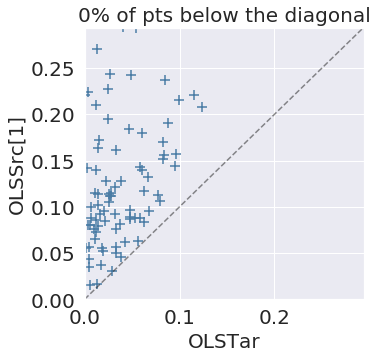

0.2904077514517853


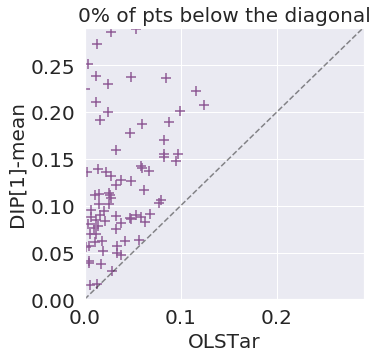

0.1194694496691227


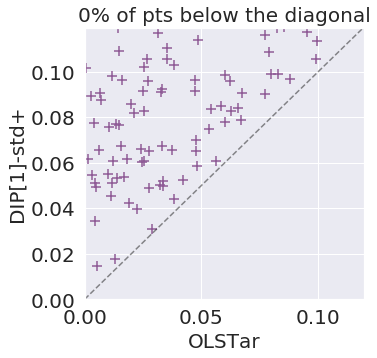

0.1471892199707031


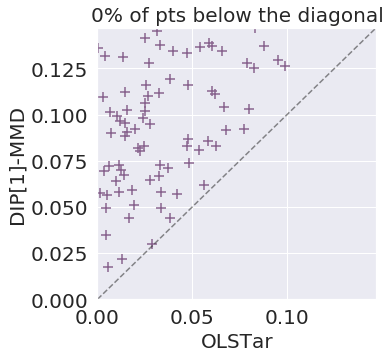

0.5102729774140339


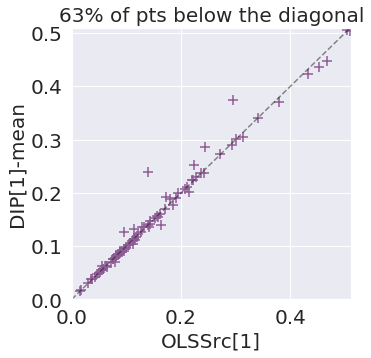

0.29382880284570706


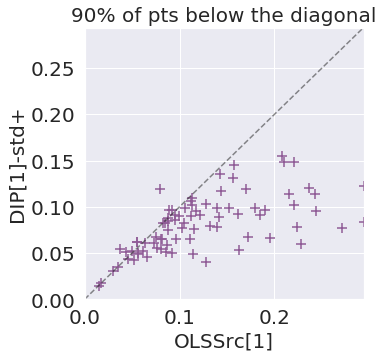

0.2950637126439528


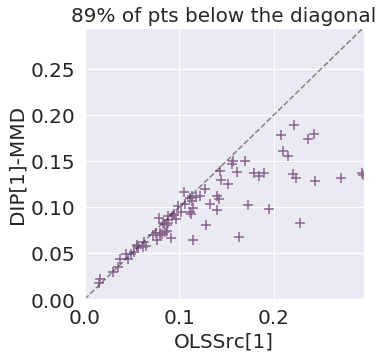

0.2904077514517853


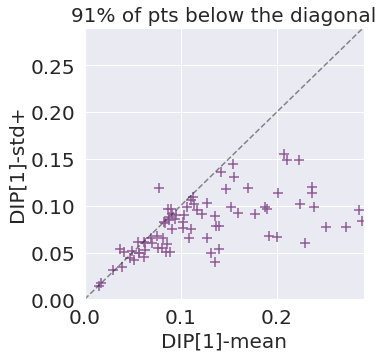

0.30136822140269903


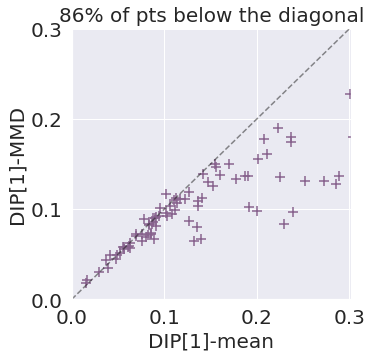

0.16037655987262725


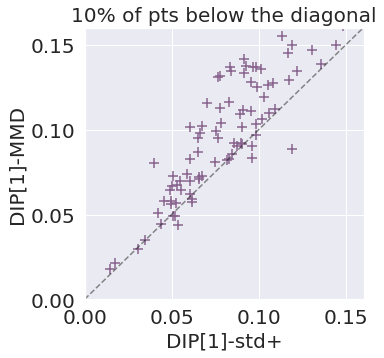

In [19]:
for index1, name1 in enumerate(names_short):
    for index2, name2 in enumerate(names_short):
        if index2 > index1:
            fig, axs = plt.subplots(1, 1, figsize=(5,5))
            nb_below_diag = np.sum(results_scat_tar_plot[index1, :] >= results_scat_tar_plot[index2, :])
            scatterplot_two_methods(axs, results_scat_tar_plot, index1, index2, names_short, COLOR_PALETTE[:len(names_short)],
                                    title="%d%% of pts below the diagonal" % (nb_below_diag),
                                    ylimmax = -1)


            plt.savefig("%s/sim_6_2_exp_%s_single_repeat_%s_vs_%s.pdf" %(save_dir, interv_type, name1, name2), bbox_inches="tight")
            plt.show()

#### 9 Multiple source anti-causal DA with Y interv + variance shift - scatterplots

Scatterplots showing that CIRM-std+ and CIRM-MMD works

In [20]:
interv_type = 'smv1'
M = 15
lamL2 = 0.
lamL1 = 0.
epochs = 20000
lr = 1e-4
n = 5000
prefix_template_exp9 = "simu_results/sim_exp9_scat_r0%sd20x4_%s_lamMatch%s_lamCIP%s_n%d_epochs%d_seed%d"

In [21]:
nb_ba = 4 # OLSTar, SrcPool, OLSTar, SrcPool
results9_src_ba = np.zeros((M-1, nb_ba, 2, 100))
results9_tar_ba = np.zeros((1, nb_ba, 2, 100))


for myseed in range(100):
    savefilename_prefix = prefix_template_exp9 %(interv_type, 'baseline',
                                                   1., 0.1, n, epochs, myseed)
    res_all_ba = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
    results9_src_ba[0, :, :, myseed] = res_all_ba.item()['src'][0, :, 0]
    results9_tar_ba[0, :, :, myseed] = res_all_ba.item()['tar'][:, :, 0]


In [22]:
lamMatches = [10.**(k) for k in (np.arange(10)-5)]

nb_damean = 5 # DIP, DIPOracle, DIPweigh, CIP, CIRMweigh
results9_src_damean = np.zeros((len(lamMatches), M-1, nb_damean, 2, 100))-1
results9_tar_damean = np.zeros((len(lamMatches), 1, nb_damean, 2, 100))-1

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp9 %(interv_type, 'DAmean',
                                                lam, 0.1, 5000, epochs, myseed)
        res_all_damean = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results9_src_damean[k, :, :, :, myseed] = res_all_damean.item()['src'][:, :, :, 0]
        results9_tar_damean[k, 0, :, :, myseed] = res_all_damean.item()['tar'][:, :, 0]

In [23]:
nb_dastd = 4 # DIP-std+, DIPweigh-std+, CIP-std+, CIRMweigh-std+
results9_src_dastd = np.zeros((len(lamMatches), M-1, nb_dastd, 2, 100))-1
results9_tar_dastd = np.zeros((len(lamMatches), 1, nb_dastd, 2, 100))-1

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp9 %(interv_type, 'DAstd',
                                                lam, 0.1, 5000, epochs, myseed)
        res_all_dastd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results9_src_dastd[k, :, :, :, myseed] = res_all_dastd.item()['src'][:, :, :, 0]
        results9_tar_dastd[k, 0, :, :, myseed] = res_all_dastd.item()['tar'][:, :, 0]

In [24]:
nb_dammd = 4 # DIP-MMD, DIPweigh-MMD, CIP-MMD, CIRMweigh-MMMD
results9_src_dammd = np.zeros((len(lamMatches), M-1, nb_dammd, 2, 100))-1
results9_tar_dammd = np.zeros((len(lamMatches), 1, nb_dammd, 2, 100))-1

for myseed in range(100):
    for k, lam in enumerate(lamMatches):
        
        savefilename_prefix = prefix_template_exp9 %(interv_type, 'DAMMD',
                                                lam, 0.1, 5000, 2000, myseed)
        res_all_dammd = np.load("%s.npy" %savefilename_prefix, allow_pickle=True)
        results9_src_dammd[k, :, :, :, myseed] = res_all_dammd.item()['src'][:, :, :, 0]
        results9_tar_dammd[k, 0, :, :, myseed] = res_all_dammd.item()['tar'][:, :, 0]

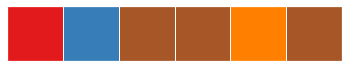

In [25]:
# now add the methods
names_short = ["Tar", "SrcPool", "CIRMweigh-mean", "CIRMweigh-std+", "DIPweigh-MMD", "CIRMweigh-MMD"]

COLOR_PALETTE1 = sns.color_palette("Set1", 9, desat=1.)
COLOR_PALETTE = [COLOR_PALETTE1[k] for k in [0, 1, 2, 3, 4, 7, 6]]
COLOR_PALETTE = [COLOR_PALETTE[k] for k in [0, 1, 6, 6, 4, 6]]
sns.palplot(COLOR_PALETTE)

In [26]:
lamMatchIndex = 6
print("Fix lambda choice: lmabda = ", lamMatches[lamMatchIndex])
results9_tar_plot = np.concatenate((results9_tar_ba[0, :2, 0, :],
                                   results9_tar_damean[lamMatchIndex, 0, 4, 0, :].reshape(1, -1),
                                   results9_tar_dastd[lamMatchIndex, 0, 3, 0, :].reshape(1, -1),
                                   results9_tar_dammd[lamMatchIndex, 0, 1, 0, :].reshape(1, -1),
                                   results9_tar_dammd[lamMatchIndex, 0, 3, 0, :].reshape(1, -1)), axis=0)


Fix lambda choice: lmabda =  10.0


0.09772972959029107


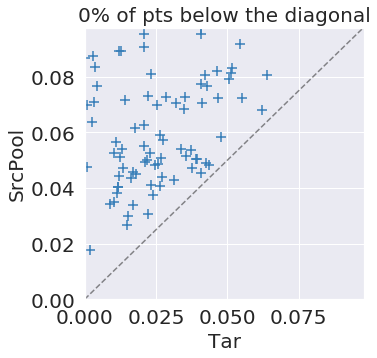

0.30972591561186097


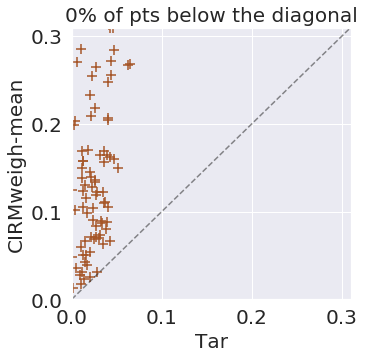

0.06236760116198426


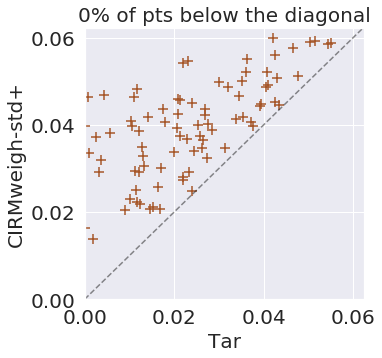

1.2929128124999998


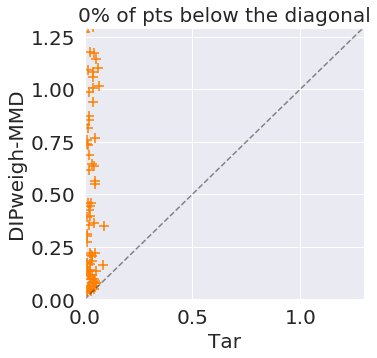

0.08649092609146632


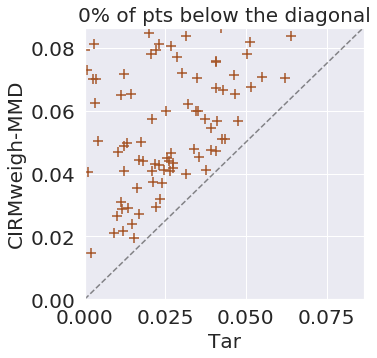

0.31266761070675125


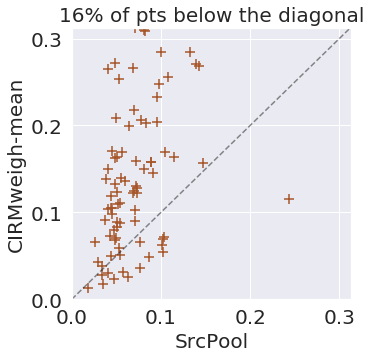

0.10173768885987237


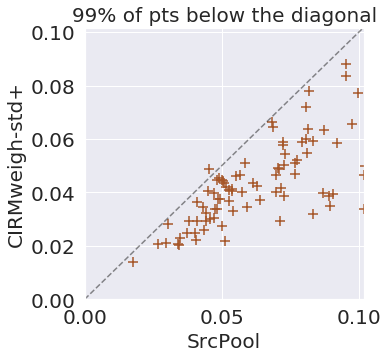

1.2929128124999998


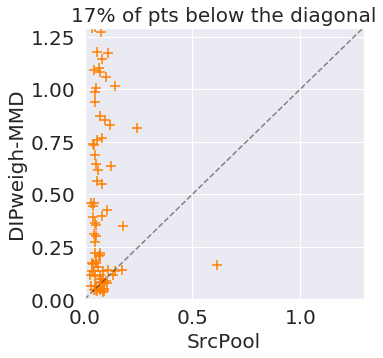

0.10904760195978747


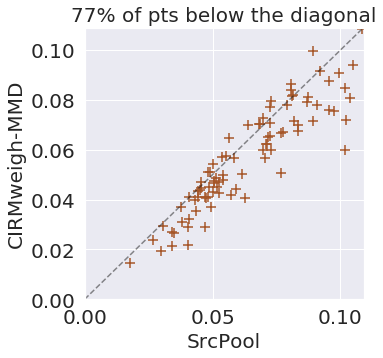

0.30972591561186097


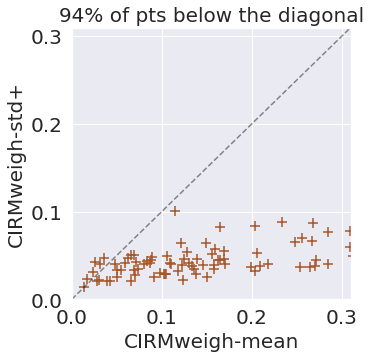

1.2929128124999998


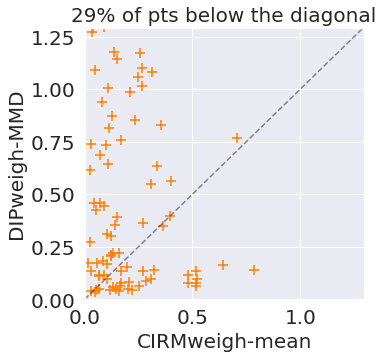

0.31266761070675125


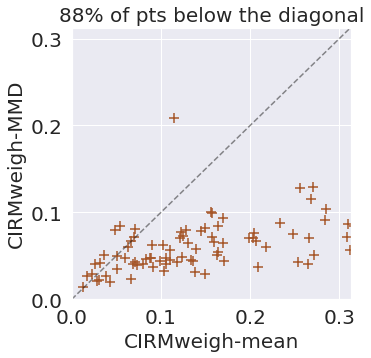

1.2929128124999998


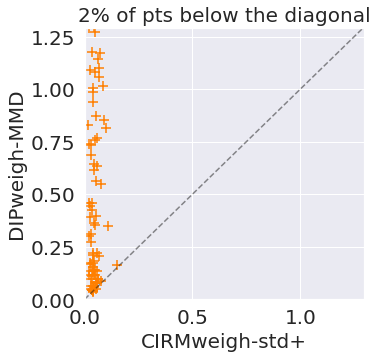

0.08847796354055404


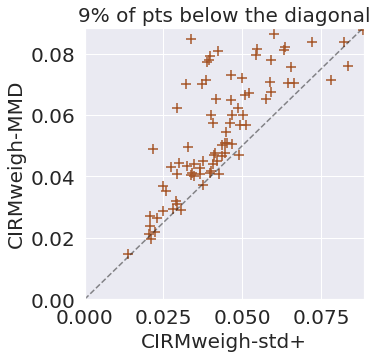

1.2929128124999998


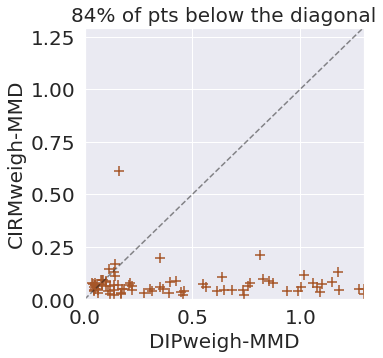

In [27]:
for index1, name1 in enumerate(names_short):
    for index2, name2 in enumerate(names_short):
        if index2 > index1:
            fig, axs = plt.subplots(1, 1, figsize=(5,5))
            nb_below_diag = np.sum(results9_tar_plot[index1, :] >= results9_tar_plot[index2, :])
            scatterplot_two_methods(axs, results9_tar_plot, index1, index2, names_short, COLOR_PALETTE[:len(names_short)],
                                    title="%d%% of pts below the diagonal" % (nb_below_diag),
                                    ylimmax = -1)


            plt.savefig("%s/sim_6_2_exp_%s_y_shift_single_repeat_%s_vs_%s.pdf" %(save_dir, interv_type, name1, name2), bbox_inches="tight")
            plt.show()